In [1]:
#Import Numpy, Pandas, and plotting modules
import pandas as pd
import os
import datetime as dt
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
#Import master dataframe created in cleaning notebook
with open("master_df.csv", "r") as f:
    master_df = pd.read_csv(f)

In [3]:
#View master dataframe
master_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year,delivery_duration,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state,seller_city_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000000,2017-10-02 11:07:15.000000000,2017-10-04 19:55:00.000000000,2017-10-10 21:25:13.000000000,2017-10-18 00:00:00.000000000,2017-10,6 days 01:30:13,...,4.0,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP"
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000000,2017-10-02 11:07:15.000000000,2017-10-04 19:55:00.000000000,2017-10-10 21:25:13.000000000,2017-10-18 00:00:00.000000000,2017-10,6 days 01:30:13,...,4.0,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP"
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000000,2017-10-02 11:07:15.000000000,2017-10-04 19:55:00.000000000,2017-10-10 21:25:13.000000000,2017-10-18 00:00:00.000000000,2017-10,6 days 01:30:13,...,4.0,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP"
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31.000000000,2017-08-15 20:05:16.000000000,2017-08-17 15:28:33.000000000,2017-08-18 14:44:43.000000000,2017-08-28 00:00:00.000000000,2017-08,0 days 23:16:10,...,4.0,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP"
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47.000000000,2017-08-02 18:43:15.000000000,2017-08-04 17:35:43.000000000,2017-08-07 18:30:01.000000000,2017-08-15 00:00:00.000000000,2017-08,3 days 00:54:18,...,4.0,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115815,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2018-07,5 days 00:32:57,...,2.0,750.0,30.0,28.0,28.0,Construction_Tools_Lights,13660,Porto Ferreira,SP,"Porto Ferreira, SP"
115816,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,2017-03,NaN,...,2.0,400.0,16.0,4.0,11.0,Auto,89031,Blumenau,SC,"Blumenau, SC"
115817,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,2018-07,9 days 07:33:35,...,2.0,2100.0,80.0,8.0,30.0,Furniture_Decor,13478,Americana,SP,"Americana, SP"
115818,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,2018-05,19 days 10:43:29,...,1.0,5900.0,41.0,21.0,41.0,Furniture_Decor,8320,Sao Paulo,SP,"Sao Paulo, SP"


In [4]:
#View columns, non-null counts, and data types
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115820 entries, 0 to 115819
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   order_id                        115820 non-null  object 
 1   customer_id                     115820 non-null  object 
 2   order_status                    115820 non-null  object 
 3   order_purchase_timestamp        115820 non-null  object 
 4   order_approved                  115820 non-null  object 
 5   delivered_to_carrier            114617 non-null  object 
 6   delivered_to_customer           113333 non-null  object 
 7   estimated_delivery_to_customer  115820 non-null  object 
 8   order_month_year                115820 non-null  object 
 9   delivery_duration               113333 non-null  object 
 10  delivery_hours                  113333 non-null  float64
 11  payment_sequential              115820 non-null  int64  
 12  payment_type    

In [5]:
#Correct datetime datatypes
master_df['order_purchase_timestamp'] = pd.to_datetime(master_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
master_df['order_approved'] = pd.to_datetime(master_df['order_approved'], format='%Y-%m-%d %H:%M:%S')
master_df['delivered_to_carrier'] = pd.to_datetime(master_df['delivered_to_carrier'], format='%Y-%m-%d %H:%M:%S')
master_df['delivered_to_customer'] = pd.to_datetime(master_df['delivered_to_customer'], format='%Y-%m-%d %H:%M:%S')
master_df['estimated_delivery_to_customer'] = pd.to_datetime(master_df['estimated_delivery_to_customer'], format='%Y-%m-%d %H:%M:%S')
master_df['order_month_year'] = master_df['order_purchase_timestamp'].dt.to_period('M')

In [6]:
#Engineer datetime and timedelta features
master_df['delivery_duration'] = (master_df['delivered_to_customer'] - master_df['delivered_to_carrier'])
master_df['delivery_hours'] = master_df['delivery_duration']/dt.timedelta(hours=1)
master_df['delivery_days'] = master_df['delivery_duration']/dt.timedelta(days=1)

In [7]:
#Check rows with NaT for delivery
null_days = master_df[master_df['delivery_days'].isna()]
null_days

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year,delivery_duration,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state,seller_city_state,delivery_days
171,1b1d6a3f8e1369c613eb19c40dab5624,e8c7b1e1584d6ba2f13473ac8e3e7cbe,shipped,2018-03-13 20:56:03,2018-03-13 21:10:31,2018-03-14 20:03:34,NaT,2018-04-04,2018-03,NaT,...,570.0,19.0,13.0,17.0,Perfumery,31570,Belo Horizonte,SP,"Belo Horizonte, SP",NaN
234,3a53d5a9a0c58d291ff3ae407b6df5fd,5612aa60cdbbd8e9d89ae0c409080375,shipped,2018-02-16 21:55:03,2018-02-17 01:26:58,2018-02-19 16:14:14,NaT,2018-03-14,2018-02,NaT,...,400.0,19.0,13.0,19.0,Perfumery,24451,Sao Goncalo,RJ,"Sao Goncalo, RJ",NaN
341,72c501775cf36e99076132aaee5ae9c0,6cc8f025e1b94225a79f478d3bcba65c,shipped,2017-12-01 12:39:39,2017-12-02 02:37:10,2017-12-04 20:39:56,NaT,2017-12-19,2017-12,NaT,...,400.0,19.0,13.0,19.0,Perfumery,9020,Santo Andre,SP,"Santo Andre, SP",NaN
449,37726a8b1cbcf77034870df2521be6f6,2976ca9e434924142eca1be125f4653b,shipped,2018-03-07 10:06:01,2018-03-07 10:15:51,2018-03-08 18:17:02,NaT,2018-03-28,2018-03,NaT,...,342.0,18.0,13.0,15.0,Watches_Gifts,14840,Guariba,SP,"Guariba, SP",NaN
495,75687059537f4b53423dc1d645c6822f,239e040dfb9ecf20be36947bbea5fa0f,shipped,2018-02-28 21:28:33,2018-02-28 21:48:26,2018-03-03 00:05:26,NaT,2018-03-19,2018-02,NaT,...,342.0,18.0,13.0,15.0,Watches_Gifts,14840,Guariba,SP,"Guariba, SP",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115801,8505d7267ce3f58c129ffa8468cebf21,af81a8c415a28b1ba710741f8e2562fe,processing,2017-02-15 23:00:16,2017-02-15 23:10:12,NaT,NaT,2017-04-04,2017-02,NaT,...,1700.0,33.0,12.0,33.0,Bed_Bath_Table,2372,Sao Paulo,SP,"Sao Paulo, SP",NaN
115810,f5f8998eee8ec7bc513dc52847d64ce0,f4656b824844a039a87fd9c51ad3586a,canceled,2018-03-01 11:42:23,2018-03-01 12:20:32,NaT,NaT,2018-03-20,2018-03,NaT,...,3500.0,20.0,20.0,20.0,Furniture_Decor,13632,Pirassununga,SP,"Pirassununga, SP",NaN
115813,5a8a4dc28b16fb90469ad749f9535773,c0c8b8bb055100a0cc08dcc04d847ac9,canceled,2018-03-13 10:58:09,2018-03-14 03:08:35,NaT,NaT,2018-03-23,2018-03,NaT,...,1700.0,30.0,5.0,30.0,Garden_Tools,3658,Sao Paulo,SP,"Sao Paulo, SP",NaN
115814,5a8a4dc28b16fb90469ad749f9535773,c0c8b8bb055100a0cc08dcc04d847ac9,canceled,2018-03-13 10:58:09,2018-03-14 03:08:35,NaT,NaT,2018-03-23,2018-03,NaT,...,1700.0,30.0,5.0,30.0,Garden_Tools,3658,Sao Paulo,SP,"Sao Paulo, SP",NaN


## Step 3) Visualize Datasets

3a: [Orders and Deliveries](#Orders-and-Deliveries)

3b: [Payments](#Payments)

3c: [Product Behavior](#Product-Behavior)

3d: [Customer Behavior](#Customer-Behavior)

3e: [Seller Behavior](#Seller-Behavior)

# Orders and Deliveries

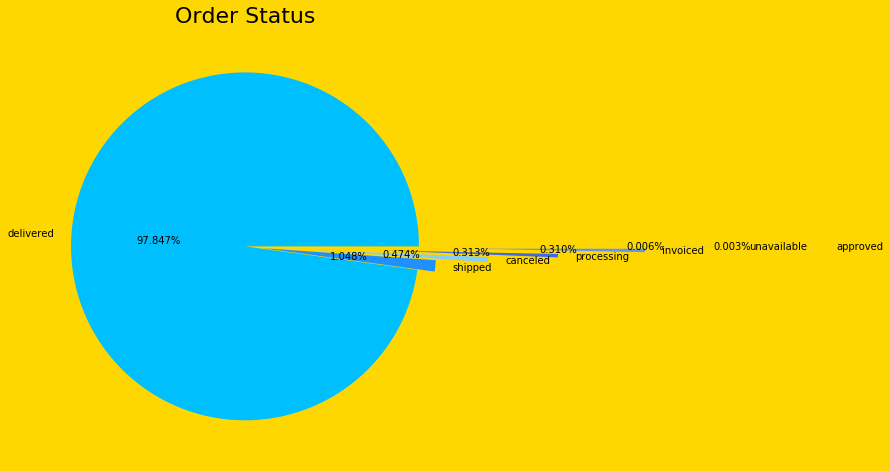

In [8]:
#Pie chart of order status
vc = master_df['order_status'].value_counts()
labels = vc.index
explode = (0, 0.1, .4 , .8, 1.3, 1.8, 2.3)

plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(master_df['order_status'].value_counts(), explode=explode, labels=labels, colors=colors, autopct='%1.3f%%', pctdistance=.5)
plt.title('Order Status', fontsize=22)
plt.show()

In [9]:
#Create variable for average number of delivery days by customer state
avg_days_by_state = master_df.groupby(['customer_state'])['delivery_days'].mean().sort_values()

In [10]:
#Create quick table of delivery days by customer state
round(master_df.groupby(['customer_state'])['delivery_days'].mean().sort_values(ascending=False),2)

customer_state
RR    24.49
AP    24.47
AM    23.73
AL    20.94
PA    20.28
MA    17.88
SE    17.78
CE    17.43
AC    17.25
PB    17.07
RO    16.92
PI    16.09
RN    15.91
BA    15.83
PE    15.03
MT    14.76
TO    13.57
MS    12.28
ES    12.21
GO    12.20
RS    11.94
RJ    11.83
SC    11.57
DF     9.67
MG     8.72
PR     8.65
SP     5.54
Name: delivery_days, dtype: float64

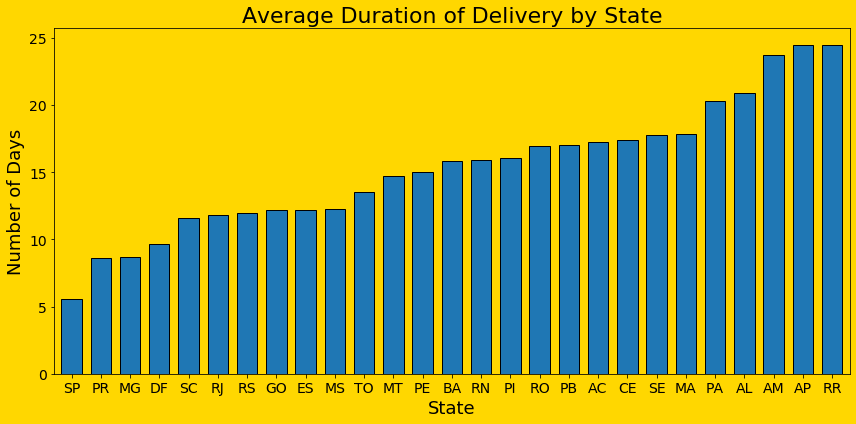

In [11]:
#Bar chart of average number of delivery days by state
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
avg_days_by_state.plot(kind='bar', width=0.7, edgecolor='k')
plt.xlabel('State', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.title('Average Duration of Delivery by State', fontsize=22)
plt.tight_layout()
plt.show()

In [12]:
#Create variable for median number of delivery days by state
med_days_by_state = master_df.groupby(['customer_state'])['delivery_days'].median().sort_values()

In [13]:
#Create quick table for median number of delivery days by state
round(master_df.groupby(['customer_state'])['delivery_days'].median().sort_values(ascending=False),2)

customer_state
AM    23.34
RR    21.27
AP    20.65
AL    18.07
PA    17.18
MA    15.72
RO    15.23
AC    14.52
SE    14.27
CE    14.24
PB    14.13
BA    13.58
PI    13.44
RN    13.25
MT    13.19
PE    12.80
TO    12.11
MS    11.01
GO    10.82
RS     9.95
ES     9.88
SC     9.35
RJ     8.31
DF     8.00
MG     7.19
PR     7.09
SP     4.35
Name: delivery_days, dtype: float64

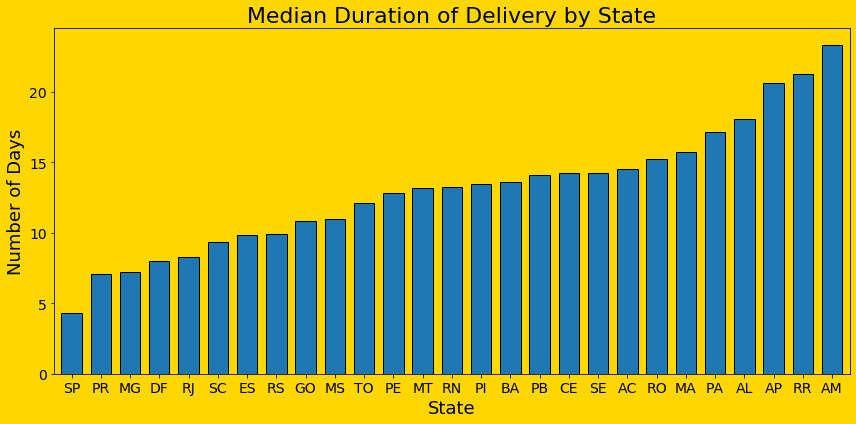

In [14]:
#Bar chart of median number of delivery days by state
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
med_days_by_state.plot(kind='bar', width=0.7, edgecolor='k')
plt.xlabel('State', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.title('Median Duration of Delivery by State', fontsize=22)
plt.tight_layout()
plt.show()

In [15]:
#Quick table of number of delivery hours
master_df['delivery_hours'].value_counts(bins=[0,50,100,200,400,800,1600,2000]).sort_index()

(-0.001, 50.0]      13498
(50.0, 100.0]       16079
(100.0, 200.0]      39584
(200.0, 400.0]      30098
(400.0, 800.0]      11812
(800.0, 1600.0]      2091
(1600.0, 2000.0]       82
Name: delivery_hours, dtype: int64

In [16]:
#Quick table of number of delivery days
master_df['delivery_days'].value_counts(bins=
                                        [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]).sort_index()

(-0.001, 5.0]    35062
(5.0, 10.0]      41927
(10.0, 15.0]     19125
(15.0, 20.0]      7740
(20.0, 25.0]      4360
(25.0, 30.0]      2101
(30.0, 35.0]      1119
(35.0, 40.0]       708
(40.0, 45.0]       460
(45.0, 50.0]       247
(50.0, 55.0]       147
(55.0, 60.0]        93
(60.0, 65.0]        55
(65.0, 70.0]        47
(70.0, 75.0]        30
(75.0, 80.0]        18
(80.0, 85.0]        13
(85.0, 90.0]         3
(90.0, 95.0]         7
(95.0, 100.0]        9
Name: delivery_days, dtype: int64

In [17]:
#Quick table of the shortest and longest delivery by state
round(master_df.groupby(['customer_state']).agg({'delivery_days':['min','max']}),2)

delivery_days        
                         min     max
customer_state                      
AC                      6.28   70.08
AL                      2.72   87.38
AM                      2.85  138.28
AP                      4.01  182.34
BA                      0.25  167.01
CE                      0.00  166.99
DF                      0.77   56.92
ES                      0.92  195.03
GO                      0.73  178.93
MA                      0.72  162.94
MG                      0.00  182.10
MS                      0.00   56.49
MT                      1.63   73.08
PA                      2.33  188.09
PB                      2.91   98.85
PE                      0.38  165.15
PI                      1.08  190.24
PR                      0.00   92.41
RJ                      0.00  205.19
RN                      0.33  172.96
RO                      5.06   44.59
RR                      3.00  169.16
RS                      0.31  181.99
SC                      0.57   97.36
SE                      2.02  194.21
SP                      0.00  186.40
TO                      3.08   55.00

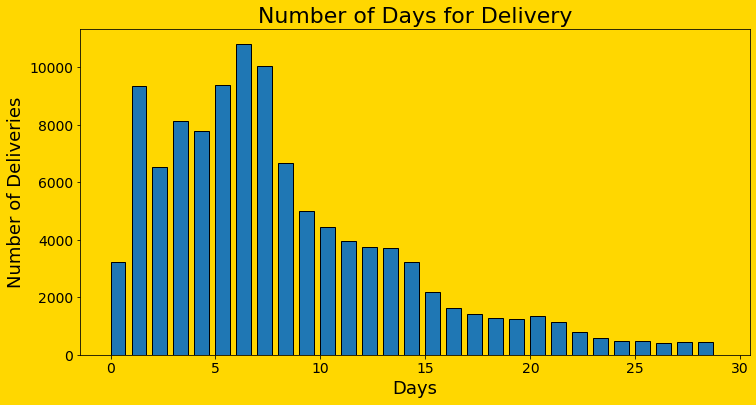

In [18]:
#Histogram of number of days for delivery
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.hist(master_df['delivery_days'], bins=range(0,30), width=0.7, edgecolor='k')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Deliveries', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Days for Delivery', fontsize=22)
plt.show()

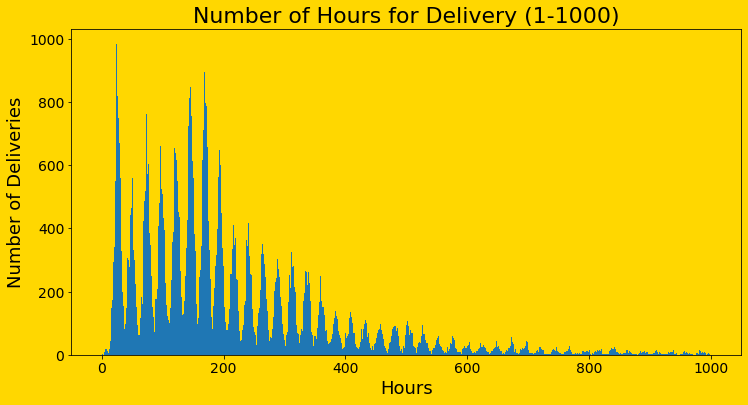

In [19]:
#Histogram of number of hours for delivery (limited to 1000)
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.hist(master_df['delivery_hours'], bins=range(0,1000))
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Number of Deliveries', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Hours for Delivery (1-1000)', fontsize=22)
plt.show()

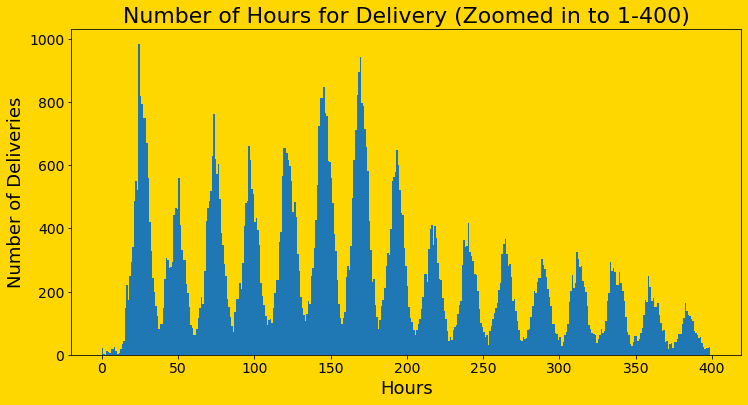

In [20]:
#Histogram of number of hours for delivery (limited to 400)
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.hist(master_df['delivery_hours'], bins=range(0,400))
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Number of Deliveries', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Hours for Delivery (Zoomed in to 1-400)', fontsize=22)
plt.show()

In [21]:
#Create variable for average delivery days by month and year
avg_deliv_days = master_df.groupby(['order_month_year'])['delivery_days'].mean()

In [22]:
#Create quick table for average delivery days by month and year
round(master_df.groupby(['order_month_year'])['delivery_days'].mean(),2)

order_month_year
2016-09      NaN
2016-10     5.97
2016-12     1.40
2017-01     9.24
2017-02     9.62
2017-03     9.78
2017-04    11.06
2017-05     8.40
2017-06     9.03
2017-07     8.34
2017-08     7.78
2017-09     8.69
2017-10     8.26
2017-11    10.87
2017-12    11.56
2018-01    10.42
2018-02    13.23
2018-03    12.62
2018-04     8.53
2018-05     8.68
2018-06     6.57
2018-07     6.05
2018-08     5.16
2018-09      NaN
Freq: M, Name: delivery_days, dtype: float64

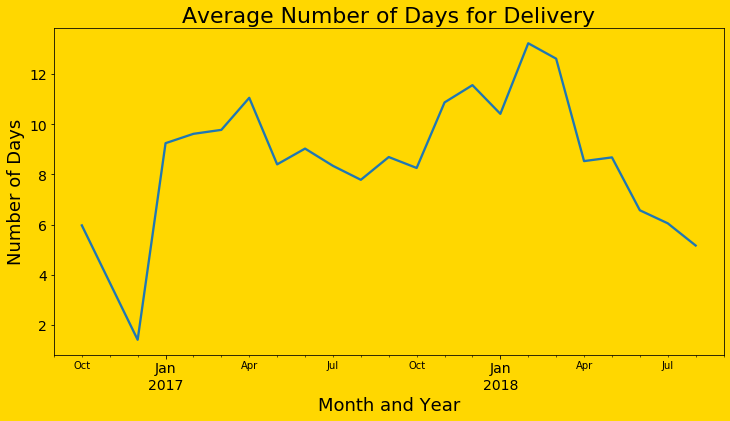

In [23]:
#Line chart of average number of days for delivery over time
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
avg_deliv_days.plot(kind='line', linewidth=2.3)
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Number of Days for Delivery', fontsize=22)
plt.show()

In [24]:
#Create variable for median delivery days by month and year
median_deliv_days = master_df.groupby(['order_month_year'])['delivery_days'].median()

In [25]:
#Create quick table for median delivery days by month and year
round(master_df.groupby(['order_month_year'])['delivery_days'].median(),2)

order_month_year
2016-09      NaN
2016-10     3.52
2016-12     1.40
2017-01     7.15
2017-02     7.64
2017-03     6.96
2017-04     8.88
2017-05     7.02
2017-06     7.31
2017-07     7.01
2017-08     6.83
2017-09     7.10
2017-10     7.01
2017-11     8.32
2017-12     9.05
2018-01     8.01
2018-02    10.93
2018-03     9.65
2018-04     6.81
2018-05     6.47
2018-06     5.51
2018-07     5.27
2018-08     4.91
2018-09      NaN
Freq: M, Name: delivery_days, dtype: float64

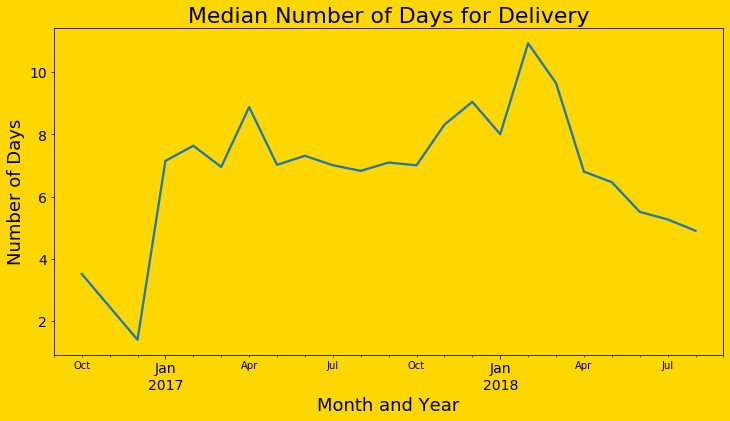

In [26]:
#Line chart of median number of delivery days over time
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
median_deliv_days.plot(kind='line', linewidth=2.3)
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Median Number of Days for Delivery', fontsize=22)
plt.show()

# Payments

In [27]:
#Create quick table of total monthly revenue over time
master_df.groupby(['order_month_year'])['payment_value'].sum().sort_index()

order_month_year
2016-09        347.52
2016-10      72910.10
2016-12         19.62
2017-01     185320.62
2017-02     332265.31
2017-03     517256.51
2017-04     493438.43
2017-05     709469.44
2017-06     591674.68
2017-07     726559.23
2017-08     861096.70
2017-09    1005176.95
2017-10     991931.50
2017-11    1565721.40
2017-12    1022777.73
2018-01    1374723.23
2018-02    1288090.24
2018-03    1451515.86
2018-04    1486213.40
2018-05    1499463.18
2018-06    1294651.03
2018-07    1343682.04
2018-08    1224172.19
2018-09        166.46
Freq: M, Name: payment_value, dtype: float64

In [28]:
#Create variable of total revenue over time
revenue_over_time = master_df.groupby(['order_month_year'])['payment_value'].sum().sort_index()

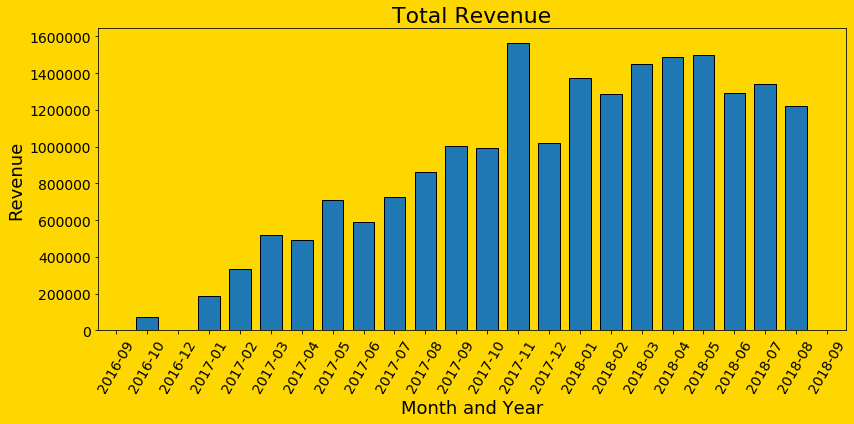

In [29]:
#Bar Chart of total revenue over time
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
revenue_over_time.plot(kind='bar', width=0.7, edgecolor='k')
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Revenue', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Total Revenue', fontsize=22)
plt.tight_layout()
plt.show()

In [30]:
#Create variable for average order amount over time
avg_rev_over_time = master_df.groupby(['order_month_year'])['payment_value'].mean().sort_index()

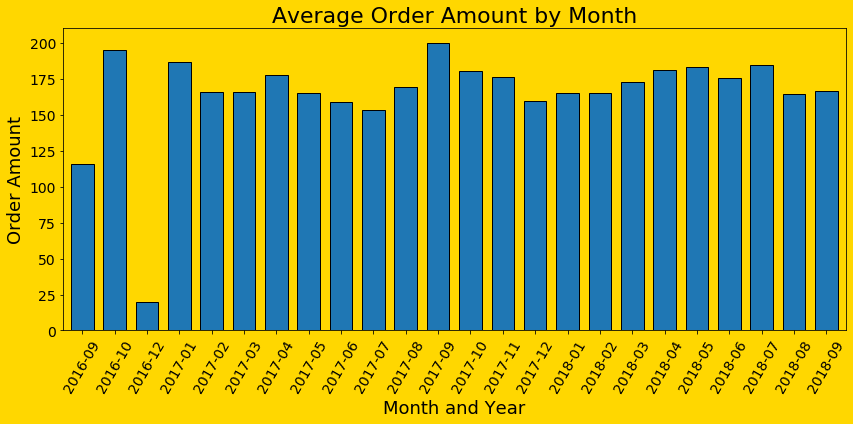

In [31]:
#Bar chart of average order amount over time
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
avg_rev_over_time.plot(kind='bar', width=0.7, edgecolor='k')
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Order Amount', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Average Order Amount by Month', fontsize=22)
plt.tight_layout()
plt.show()

In [32]:
#Create variable for median order amount over time
med_rev_over_time = master_df.groupby(['order_month_year'])['payment_value'].median().sort_index()

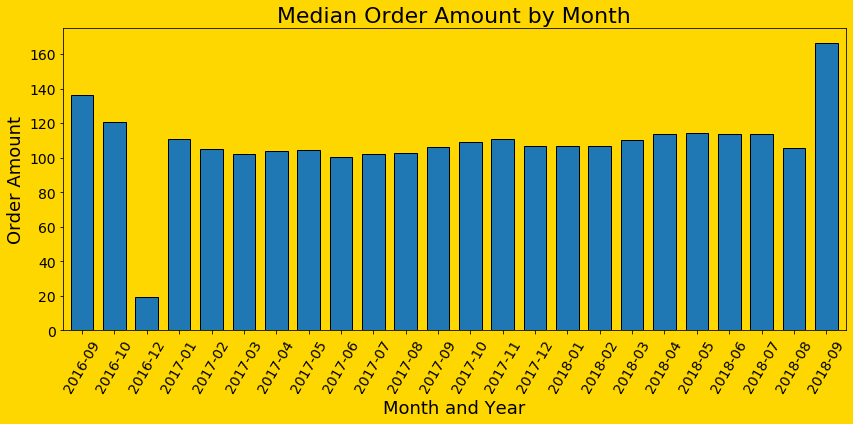

In [33]:
#Bar chart of average order amount over time
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
med_rev_over_time.plot(kind='bar', width=0.7, edgecolor='k')
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Order Amount', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Median Order Amount by Month', fontsize=22)
plt.tight_layout()
plt.show()

In [34]:
#Table of payment type summary statistics
round(master_df.groupby(['payment_type']).agg({
    'payment_value':['sum','mean','median','min','max','count']}),2)

payment_value                                        
                       sum    mean  median    min       max  count
payment_type                                                      
Boleto          3997932.21  177.46  105.67  11.62   7274.88  22529
Credit_Card    15394024.92  180.07  115.35   0.01  13664.08  85487
Debit_Card       249120.89  150.25   97.44  13.38   4445.50   1658
Voucher          397565.35   64.69   40.00   0.00   1839.05   6146

In [35]:
#Table of the percentage of total sales for each payment type 
round(master_df.groupby(['payment_type']).agg(
    {'payment_value':'sum'}).sort_values(by=
                                         'payment_value', ascending=
                                         False) / master_df['payment_value'].sum() * 100, 2).rename(
    columns={'payment_value':'pct_of_sales'})

,pct_of_sales
payment_type,
Credit_Card,76.82
Boleto,19.95
Voucher,1.98
Debit_Card,1.24


In [36]:
#Horizontal bar chart of total sales by payment type
sales_by_FOP = master_df.groupby(['payment_type'])['payment_value'].sum().sort_values()

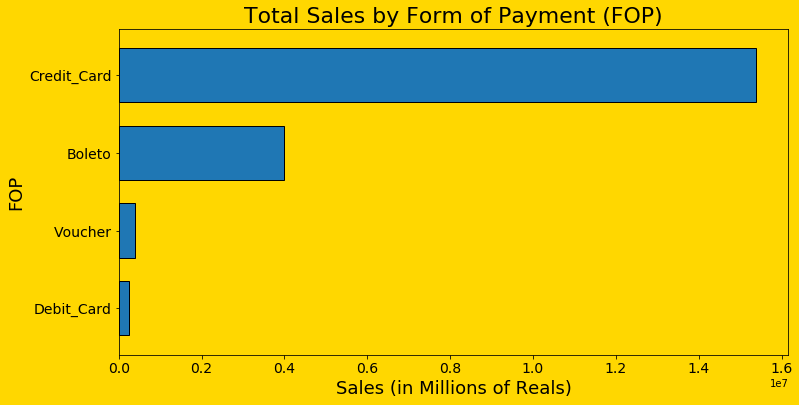

In [37]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
sales_by_FOP.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Sales (in Millions of Reals)', fontsize=18)
plt.ylabel('FOP', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Total Sales by Form of Payment (FOP)', fontsize=22)
plt.show()

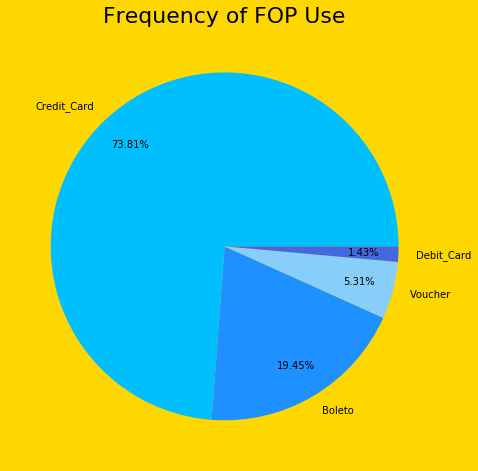

In [38]:
#Pie chart of frequency of payment type
vc = master_df['payment_type'].value_counts()
labels = vc.index

plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(master_df['payment_type'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', pctdistance=.8)
plt.title('Frequency of FOP Use', fontsize=22)
plt.show()

In [39]:
#Create variable for payment type frequency
top_pay_type = master_df['payment_type'].value_counts().sort_values(ascending=True)

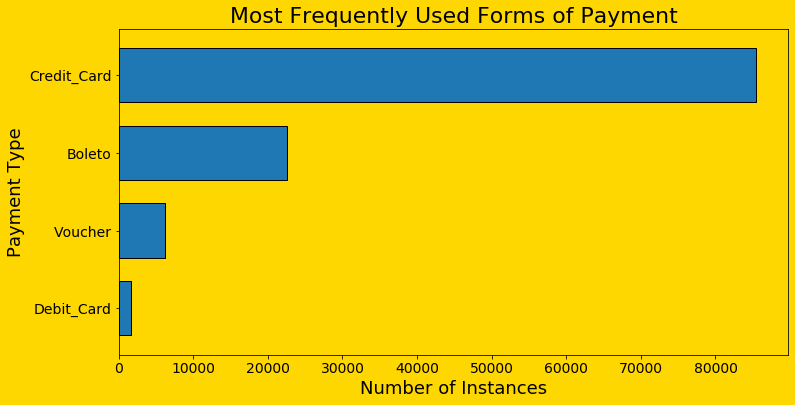

In [40]:
#Horizontal bar chart of payment type frequency
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_pay_type.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Payment Type', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Most Frequently Used Forms of Payment', fontsize=22)
plt.show()

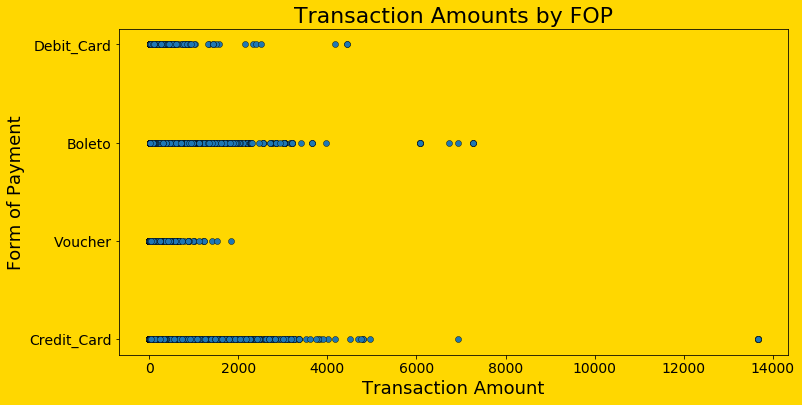

In [41]:
#Scatter plot of order amounts by payment type
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.scatter(master_df['payment_value'], master_df['payment_type'], linewidths=0.4, edgecolors='k')
plt.xlabel('Transaction Amount', fontsize=18)
plt.ylabel('Form of Payment', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Transaction Amounts by FOP', fontsize=22)
plt.show()

In [42]:
#Quick table of top 10 order months 
master_df['order_month_year'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

2017-11    8883
2018-03    8406
2018-01    8324
2018-04    8182
2018-05    8166
2018-02    7797
2018-08    7424
2018-06    7366
2018-07    7272
2017-12    6414
Freq: M, Name: order_month_year, dtype: int64

In [43]:
#Create variable for top 10 order months
top_10_orders = master_df['order_month_year'].value_counts().sort_values(ascending=True).tail(10)

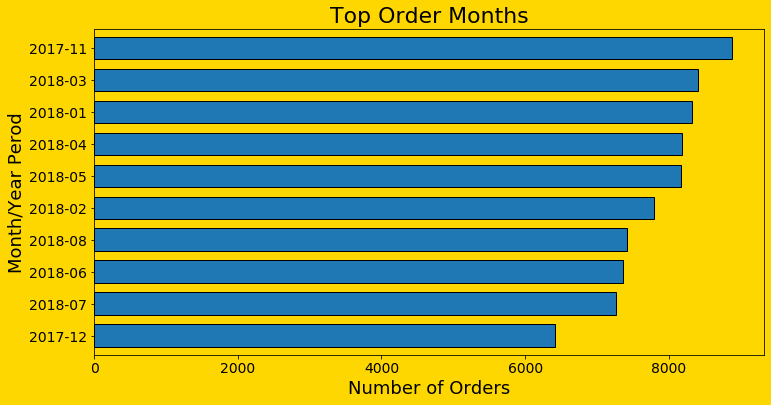

In [44]:
#Horizontal bar chart of top order months
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_orders.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Orders', fontsize=18)
plt.ylabel('Month/Year Perod', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Order Months', fontsize=22)
plt.show()

In [45]:
#Quick table of top 10 most frequent number of payment installments
master_df['payment_installments'].value_counts().sort_values(ascending=False).head(10)

1     57680
2     13465
3     11578
4      7877
10     6788
5      5939
8      5005
6      4549
7      1791
9       717
Name: payment_installments, dtype: int64

In [46]:
#Create variable for top 7 most frequent number of payment installments
top_pay_install = master_df['payment_installments'].value_counts().sort_values().tail(7)

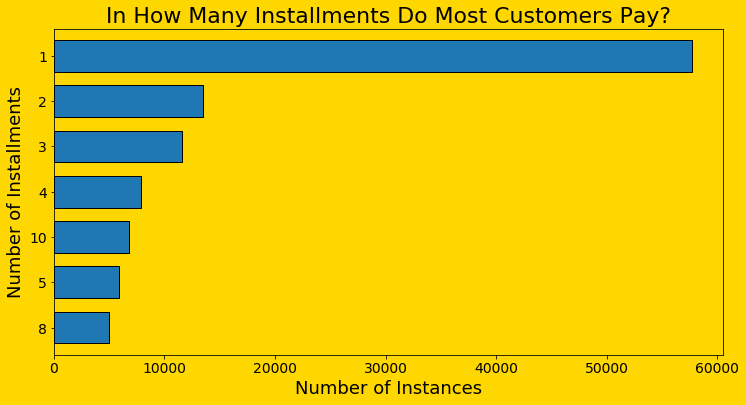

In [47]:
#Horizontal bar chart of top 7 most frequent number of payment installments
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_pay_install.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Number of Installments', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('In How Many Installments Do Most Customers Pay?', fontsize=22)
plt.show()

In [48]:
#Quick table of top 10 most amounts of forms of payment used to pay
master_df['payment_sequential'].value_counts().sort_values(ascending=False).head(10)

1     110885
2       3309
3        631
4        301
5        181
6        125
7         86
8         56
9         46
10        39
Name: payment_sequential, dtype: int64

In [49]:
#Create variable for top 5 most frequent amounts of forms of payment used to pay
top_pay_seq = master_df['payment_sequential'].value_counts().sort_values().tail(5)

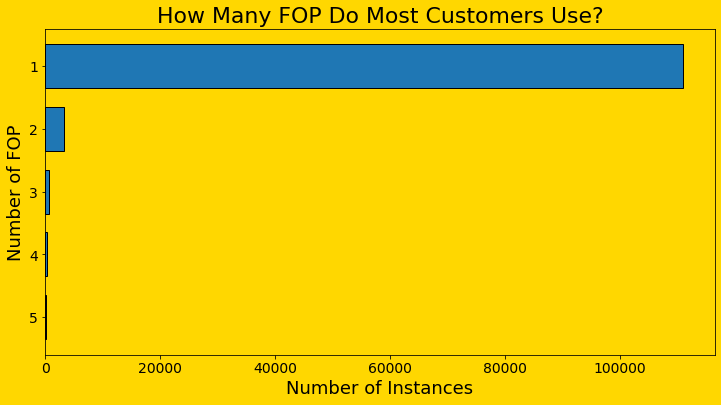

In [50]:
#Horizontal bar chart of top 5 most frequent amounts of forms of payment used to pay
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_pay_seq.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Number of FOP', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('How Many FOP Do Most Customers Use?', fontsize=22)
plt.show()

# Product Behavior

In [51]:
#Quick table of top 10 purchased product categories
master_df['category_name'].value_counts().sort_values(ascending=False).head(10)

Bed_Bath_Table           11813
Health_Beauty             9970
Sports_Leisure            8943
Furniture_Decor           8731
Computers_Accessories     8080
Housewares                7346
Watches_Gifts             6200
Telephony                 4721
Garden_Tools              4572
Auto                      4378
Name: category_name, dtype: int64

In [52]:
#Create variable for top 10 purchased product categories
top_prod_cat = master_df['category_name'].value_counts().sort_values(ascending=True).tail(10)

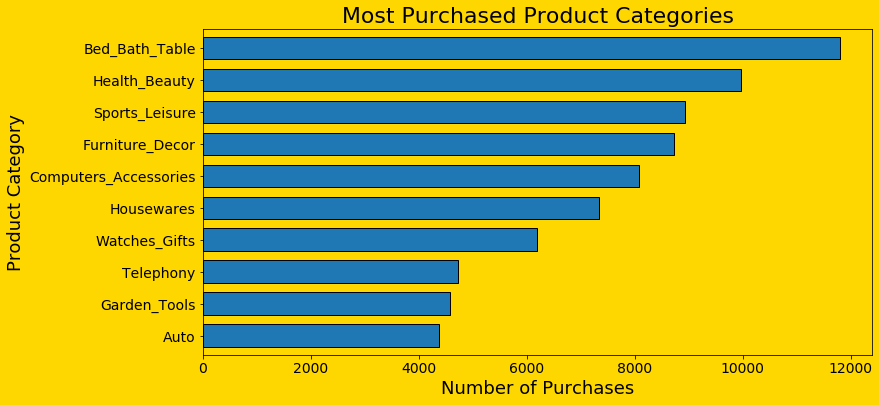

In [53]:
#Horizontal bar chart of top 10 purchased product categories
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_prod_cat.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Purchases', fontsize=18)
plt.ylabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Most Purchased Product Categories', fontsize=22)
plt.show()

In [54]:
#Table of summary statistics for category prices
round(master_df.groupby(['category_name']).agg({'payment_value':['sum', 'mean', 'median','min','max']}),2)

payment_value                                
                                     sum    mean  median    min      max
category_name                                                           
Agro_Industry_And_Commerce     118730.61  471.15  224.60   2.35  6081.54
Air_Conditioning                91170.66  301.89  187.18  26.00  1642.54
Art                             30992.93  141.52  112.02   5.54  6726.66
Arts_And_Craftmanship            2326.17   96.92   75.28  23.88   314.32
Audio                           60324.62  158.75   99.25   0.70  1506.05
...                                  ...     ...     ...    ...      ...
Stationery                     317440.07  121.30  102.13   0.00  1784.20
Tablets_Printing_Image          10042.93  115.44  110.30  10.70   912.79
Telephony                      486882.05  103.13   46.78   0.01  2457.44
Toys                           618775.01  144.88  104.28   0.01  1782.55
Watches_Gifts                 1429037.55  230.49  157.11   0.23  4445.50

[71 rows x 5 columns]

In [55]:
#Create variable for top selling product categories
top_sell_cat = master_df.groupby(['category_name'])['payment_value'].sum().sort_values().tail(10)

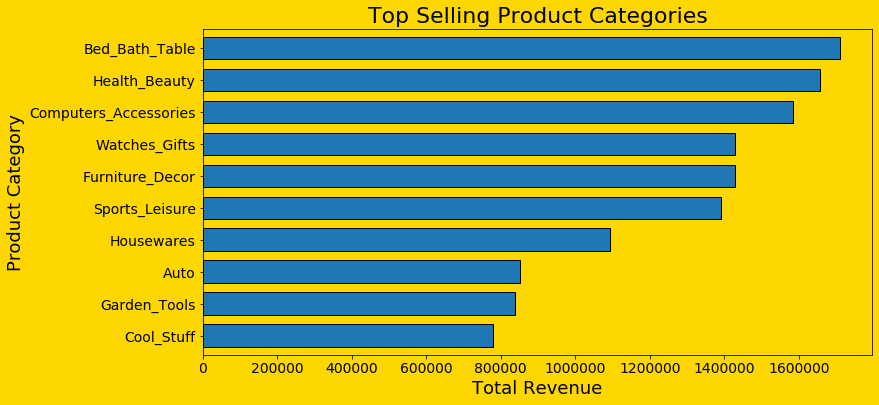

In [56]:
#Horizontal bar chart for top selling product categories
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_sell_cat.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Total Revenue', fontsize=18)
plt.ylabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Selling Product Categories', fontsize=22)
plt.show()

In [57]:
#Create variable for categories with the highest median price
top_med_cat = master_df.groupby(['category_name'])['payment_value'].median().sort_values().tail(10)

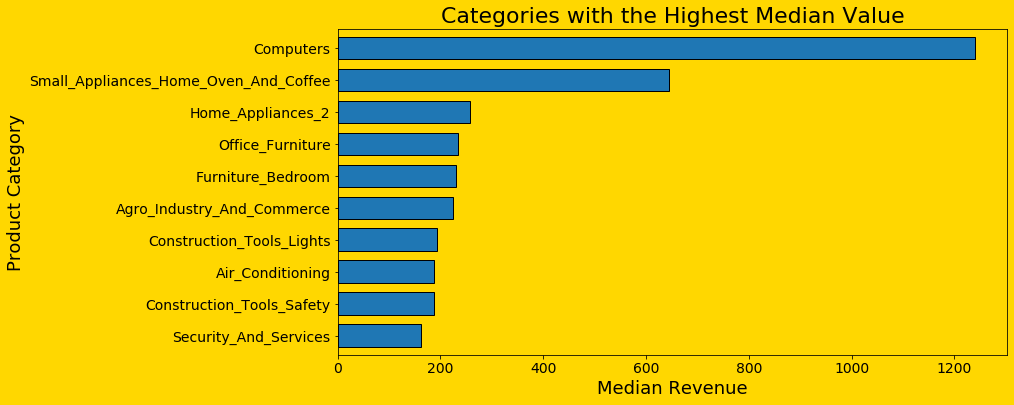

In [58]:
#Horizontal bar chart for categories with the highest median price
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_med_cat.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Median Revenue', fontsize=18)
plt.ylabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Categories with the Highest Median Value', fontsize=22)
plt.show()

## Customer Behavior

In [59]:
#Quick table of customer cities with the most orders
master_df['customer_city_state'].value_counts().sort_values().tail(10).sort_values(ascending=False)

Sao Paulo, SP                18267
Rio De Janeiro, RJ            8065
Belo Horizonte, MG            3187
Brasilia, DF                  2425
Curitiba, PR                  1792
Campinas, SP                  1714
Porto Alegre, RS              1626
Salvador, BA                  1488
Guarulhos, SP                 1383
Sao Bernardo Do Campo, SP     1089
Name: customer_city_state, dtype: int64

In [60]:
#Create variable for customer cities with the most orders
top_10_cust_citystate = master_df['customer_city_state'].value_counts().sort_values(ascending=True).tail(10)

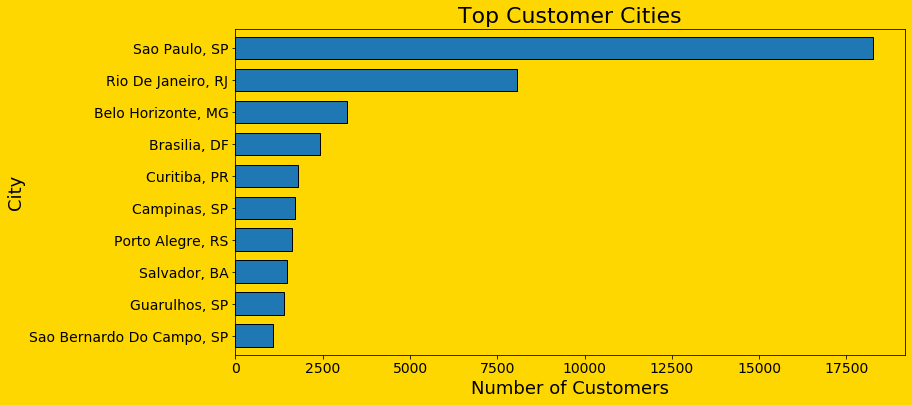

In [61]:
#Horizontal bar chart for customer cities with the most orders
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_cust_citystate.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Customers', fontsize=18)
plt.ylabel('City', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Customer Cities', fontsize=22)
plt.show()

In [62]:
#Table of customer states with the highest spend
master_df.groupby(['customer_state']).agg({
    'payment_value':'sum'}).sort_values(by='payment_value',ascending=False).head(10)

,payment_value
customer_state,
SP,7495117.89
RJ,2735903.70
MG,2299102.47
RS,1126905.94
PR,1053724.99
BA,786125.16
SC,775148.07
GO,503539.86
DF,429150.39


In [63]:
#Create variable for customer states with the highest spend
state_payments = master_df.groupby(['customer_state'])['payment_value'].sum().sort_values().tail(7)

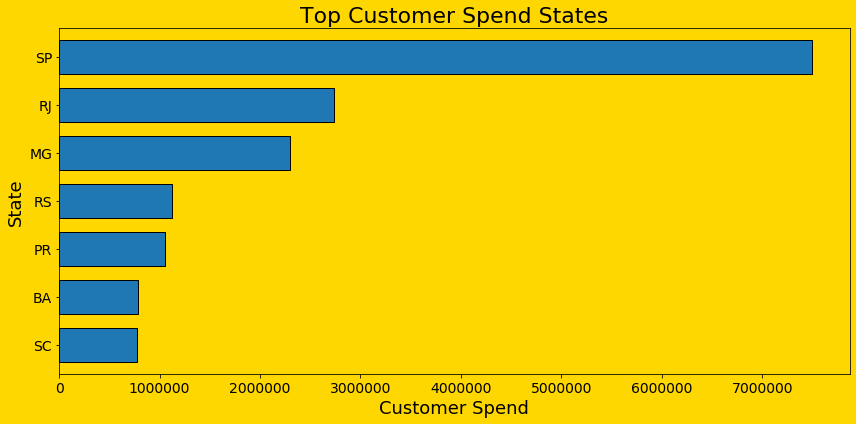

In [64]:
#Horizontal bar chart for customer states with the highest spend
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
state_payments.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Customer Spend', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Customer Spend States', fontsize=22)
plt.tight_layout()
plt.show()

In [65]:
#Table of customer states with highest median spend
master_df.groupby(['customer_state']).agg({
    'payment_value':'median'}).sort_values(by='payment_value',ascending=False).head(10)

,payment_value
customer_state,
AC,186.830
RR,167.240
AP,166.600
RO,158.805
PB,155.450
PI,152.875
PA,148.090
SE,144.120
RN,140.160


In [66]:
#Create variable for customer states with highest median spend
median_state_payments = master_df.groupby(['customer_state'])\
['payment_value'].median().sort_values().tail(10)

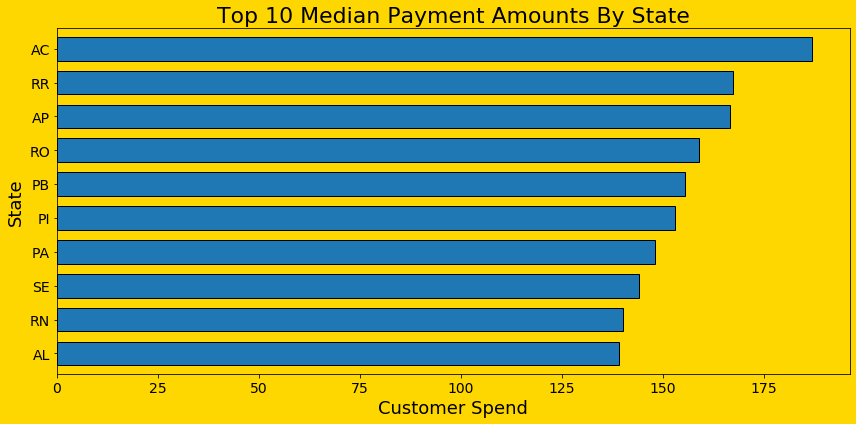

In [67]:
#Horizontal bar chart for customer states with highest median spend
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
median_state_payments.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Customer Spend', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Median Payment Amounts By State', fontsize=22)
plt.tight_layout()
plt.show()

In [68]:
#Table of customer cities with highest median spend
master_df.groupby(['customer_city_state']).agg({
    'payment_value':'sum'}).sort_values(by='payment_value',ascending=False).head(10)

,payment_value
customer_city_state,
"Sao Paulo, SP",2795540.85
"Rio De Janeiro, RJ",1550270.27
"Belo Horizonte, MG",493136.93
"Brasilia, DF",427060.18
"Curitiba, PR",326973.12
"Porto Alegre, RS",311122.56
"Salvador, BA",284146.03
"Campinas, SP",263019.11
"Goiania, GO",209340.67


In [69]:
#Create variable for customer cities with highest spend
city_state_payments = master_df.groupby(['customer_city_state'])\
['payment_value'].sum().sort_values().tail(7)

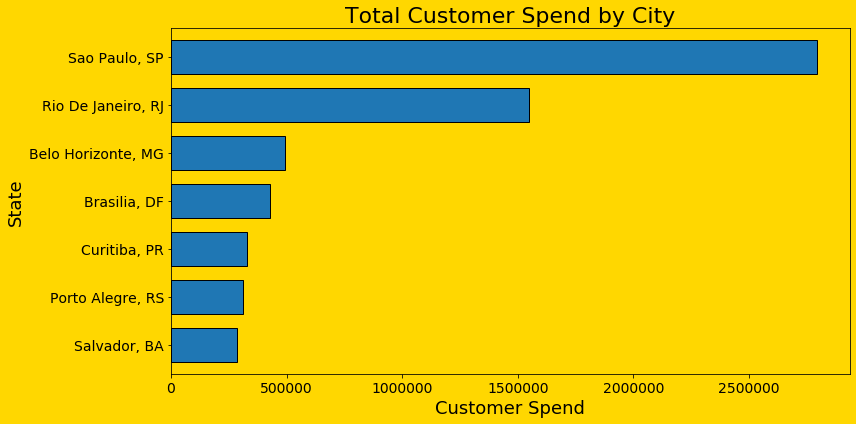

In [70]:
#Horizontal bar chart for customer cities with highest spend
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
city_state_payments.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Customer Spend', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Total Customer Spend by City', fontsize=22)
plt.tight_layout()
plt.show()

In [71]:
#Quick table of customer zip codes with the most orders 
master_df['customer_zip_code_prefix'].value_counts().sort_values(ascending=False).head(10)

24220    154
22790    153
22793    151
24230    135
22775    125
35162    123
29101    119
11740    110
13087    106
36570    104
Name: customer_zip_code_prefix, dtype: int64

In [72]:
#Create variable for customer zip codes with the most orders
top_10_cust_zip = master_df['customer_zip_code_prefix'].value_counts().sort_values().tail(10)

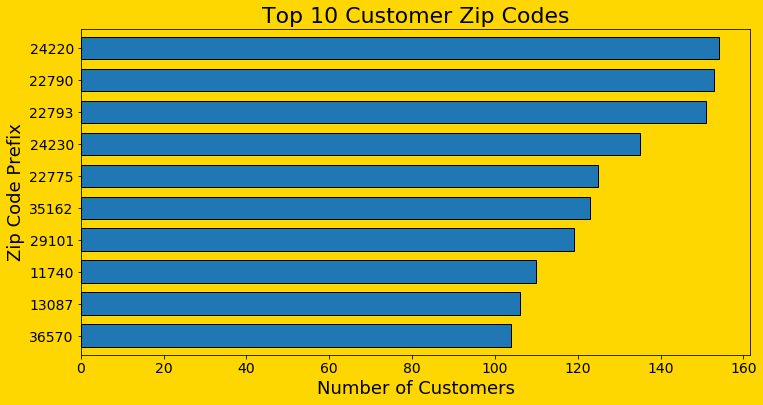

In [73]:
#Horizontal bar chart for customer zip codes with the most orders
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_cust_zip.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Customers', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Customer Zip Codes', fontsize=22)
plt.show()

## Seller Behavior

In [74]:
#Quick table of cities with the most sellers
master_df['seller_city_state'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

Sao Paulo, SP                28903
Ibitinga, SP                  8194
Santo Andre, SP               3091
Curitiba, PR                  3022
Sao Jose Do Rio Preto, SP     2676
Belo Horizonte, MG            2464
Rio De Janeiro, RJ            2452
Ribeirao Preto, SP            2339
Maringa, PR                   2257
Guarulhos, SP                 2050
Name: seller_city_state, dtype: int64

In [75]:
#Create variable for cities with the most sellers
top_10_sell_city = master_df['seller_city_state'].value_counts().sort_values(ascending=True).tail(7)

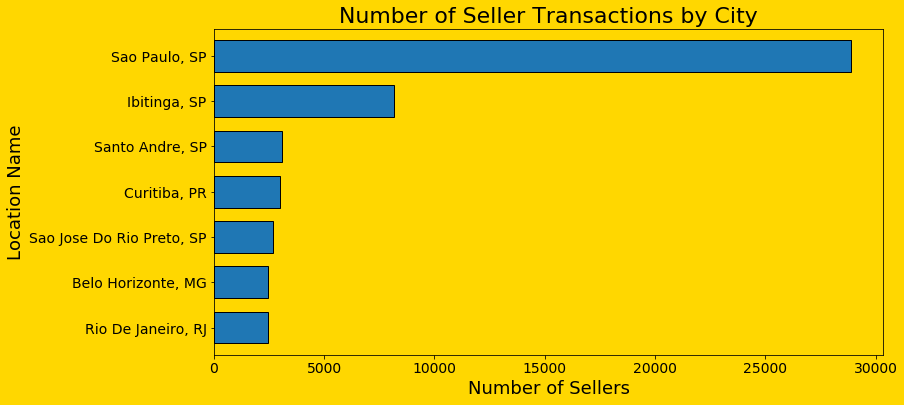

In [76]:
#Horizontal bar chart of cities with the most sellers
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_sell_city.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Sellers', fontsize=18)
plt.ylabel('Location Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Seller Transactions by City', fontsize=22)
plt.show()

In [77]:
#Quick table of seller zip codes with the most orders
master_df['seller_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

14940    8194
5849     2137
15025    2089
9015     1853
13405    1642
4782     1547
8577     1544
3204     1462
4160     1267
13232    1254
Name: seller_zip_code_prefix, dtype: int64

In [78]:
#Create variable for seller zip codes with the most orders
top_10_sell_zip = master_df['seller_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10)

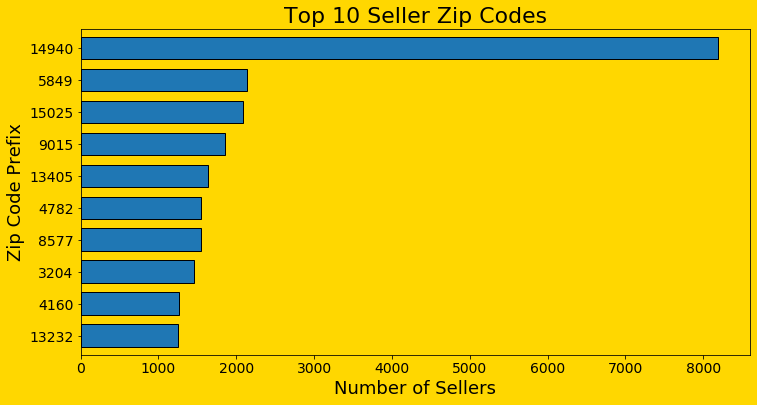

In [79]:
#Horizontal bar chart of seller zip codes with the most orders
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_sell_zip.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Sellers', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Seller Zip Codes', fontsize=22)
plt.show()